# Create a smooth fiducial for SOLikeT/lensing

In this notebook, we generate a fiducial smooth (i.e., binned spectrum-based theoretical prediction, no map-based random realization) dataset. We start from lensing spectra (lensing).

In [1]:
%matplotlib inline
import os
import tempfile

import camb
import cobaya
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

print("     Numpy :", np.__version__)
print("Matplotlib :", mpl.__version__)
print("      CAMB :", camb.__version__)
print("    Cobaya :", cobaya.__version__)

     Numpy : 1.19.5
Matplotlib : 3.3.4
      CAMB : 1.3.2
    Cobaya : 3.1.1


In [3]:
# Fiducial cosmo params. When used in a MCMC, the smooth data must agree with this input values

cosmo_params = {
    "cosmomc_theta": 0.0104090,
    "logA": {"value": 3.045, "drop": True},
    "As": {"value": "lambda logA: 1e-10*np.exp(logA)"},
    "ombh2": 0.02236,
    "omch2": 0.1202,
    "ns": 0.9649,
    "Alens": 1.0,
    "tau": 0.0544,
}

Let's use SOLikeT/lensing to generate the fiducial spectra

In [5]:
packages_path = "/Users/martina/Documents/University/Projects/solike_sandbox/cobaya_packages/"

In [6]:
#pre = "data_sacc_"
info = {
    "likelihood": {
        "soliket.LensingLikelihood": {
            "sim_number": 0,
            "stop_at_error": False}
    },
    "theory": {"camb": {"extra_args": {"lens_potential_accuracy": 1,
                                       "WantTransfer": True,
                                       "Transfer.high_precision": True,
                                       "Transfer.kmax": 1.2},
                        "stop_at_error": True}},
    "params": cosmo_params,
    "packages_path": packages_path,
    "debug": True,
}

In [7]:
from cobaya.model import get_model

model = get_model(info)

 2022-06-15 15:08:23,378 [model] Input info updated with defaults (dumped to YAML):
theory:
  camb:
    version: null
    path: null
    speed: 0.3
    stop_at_error: true
    extra_args:
      lens_potential_accuracy: 1
      WantTransfer: true
      Transfer.high_precision: true
      Transfer.kmax: 1.2
    use_renames: false
    external_primordial_pk: false
    renames:
      omegabh2: ombh2
      omegach2: omch2
      omegal: omega_de
      omegak: omk
      yhe: YHe
      yheused: YHe
      YpBBN: Y_p
      zrei: zre
likelihood:
  soliket.LensingLikelihood:
    data_folder: LensingLikelihood
    data_filename: clkk_binned.txt
    cov_filename: lensingbinnedcov.txt
    binning_matrix_filename: lensing_binning_matrix.txt
    kind: pp
    sim_number: 0
    lmax: 3000
    theory_lmax: 10000
    fiducial_params:
      ombh2: 0.02219218
      omch2: 0.1203058
      H0: 67.02393
      tau: 0.06574325
      nnu: 3.046
      num_massive_neutrinos: 1
      As: 2.15086031154146e-09
      ns

In [17]:
#model.components
my_lensing = model.likelihood["soliket.LensingLikelihood"]
#chi2 = -2 * (model.loglikes(fg_params)[0] - my_mflike.logp_const)
model.loglikes()

(array([326.80099024]), [2.101003120287951e-09])

In [26]:
np.diag(my_lensing.data.cov)

array([4.27797759e-15, 2.93923775e-15, 1.34987995e-15, 8.81701045e-16,
       4.90245671e-16, 3.37935336e-16, 3.25129946e-16, 1.41719381e-16,
       5.94465897e-17, 3.01472219e-17, 2.51327754e-17, 1.30355424e-17,
       7.81582525e-18, 5.56371674e-18, 3.27624004e-18, 1.28073888e-18,
       9.22151475e-19, 1.16390907e-18, 5.84612104e-19])

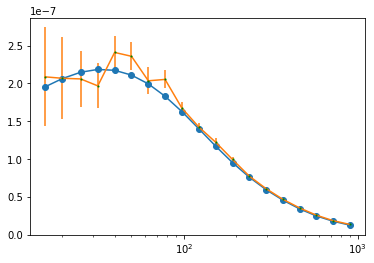

In [42]:
plt.plot(my_lensing.bin_centers,my_lensing._get_theory(**cosmo_params),ls=None,marker='o')
plt.errorbar(my_lensing._get_data()[0],my_lensing._get_data()[1],yerr=np.sqrt(np.diag(my_lensing.data.cov)),
            marker='s', mfc='red',
                 mec='green', ms=1, mew=1)
plt.xscale('log')

In [52]:
sm_data=my_lensing._get_theory(**cosmo_params)
namedir="/Users/martina/Documents/University/Projects/solike_sandbox/soliket_infncloud/soliket_mflike/smooth_data/"
np.savetxt(namedir+"clkk_binned_smooth.txt",sm_data.reshape((1,len(sm_data))))

# Test new data

Let's read the newly created data and check that we get chi2=0 if compared against same fiducial

In [58]:
info = {
    "likelihood": {
        "soliket.LensingLikelihood": {
            #"data_folder": namedir,
            "data_filename": namedir+"clkk_binned_smooth.txt"
        }
    },
    "theory": {"camb": {"extra_args": {"lens_potential_accuracy": 1,
                                       "WantTransfer": True,
                                       "Transfer.high_precision": True,
                                       "Transfer.kmax": 1.2},
                        "stop_at_error": True}},
    "params": cosmo_params,
    "modules": packages_path,
    "debug": True,
}

In [60]:
from cobaya.model import get_model

model_test = get_model(info)

 2022-06-15 15:46:17,952 [model] *WARNING* Ignored blocks/options: ['modules']
 2022-06-15 15:46:17,960 [model] Input info updated with defaults (dumped to YAML):
theory:
  camb:
    version: null
    path: null
    speed: 0.3
    stop_at_error: true
    extra_args:
      lens_potential_accuracy: 1
      WantTransfer: true
      Transfer.high_precision: true
      Transfer.kmax: 1.2
    use_renames: false
    external_primordial_pk: false
    renames:
      omegabh2: ombh2
      omegach2: omch2
      omegal: omega_de
      omegak: omk
      yhe: YHe
      yheused: YHe
      YpBBN: Y_p
      zrei: zre
likelihood:
  soliket.LensingLikelihood:
    data_folder: LensingLikelihood
    data_filename: /Users/martina/Documents/University/Projects/solike_sandbox/soliket_infncloud/soliket_mflike/smooth_data/clkk_binned_smooth.txt
    cov_filename: lensingbinnedcov.txt
    binning_matrix_filename: lensing_binning_matrix.txt
    kind: pp
    sim_number: 0
    lmax: 3000
    theory_lmax: 10000
    f

In [62]:
my_lensing_test = model_test.likelihood["soliket.LensingLikelihood"]

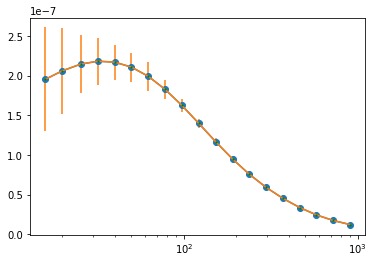

In [63]:
plt.plot(my_lensing_test.bin_centers,my_lensing_test._get_theory(**cosmo_params),ls=None,marker='o')
plt.errorbar(my_lensing_test._get_data()[0],my_lensing_test._get_data()[1],yerr=np.sqrt(np.diag(my_lensing_test.data.cov)),
            marker='s', mfc='red',
                 mec='green', ms=1, mew=1)
plt.xscale('log')

In [66]:
my_lensing_test._get_theory(**cosmo_params)-my_lensing_test._get_data()[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

Awesome!!!